
































































































































































































































































































Nom et Prénom: Hanan Atmani

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Simulation des V.A à valeurs dans un ensemble fini et les chaînes de Markov

## 1.1 généralités sur les chaînes de Markov

1. Réaliser une fonction python accessible $N (i, j, P, N )$ qui demande comme argu-
ments l’état i, l’état j , la matrice de passage P et un entier N

In [78]:
#fonction accessibleN (i, j, P, N )
def accessibleN (i, j, P, N ):
    # Vérifier la validité des indices
    if i < 0 or i > len(P[0]) or j < 0 or j > len(P[1]):
        return False
    A = np.linalg.matrix_power(P, N)
    if A[i-1,j-1] >0:
        return 1
    else:
        return 0

In [79]:
#test de fonction accessibleN (i, j, P, N )
matrice_A = np.array([[0, 1, 0],
                      [0, 0, 1],
                      [1, 0, 0]])

accessibleN(1, 3, matrice_A,1)


0

2. Réaliser une fonction python accessible(i, j, P ) qui demande comme arguments
l’état i, l’état j et la matrice de passage P

In [80]:
#fonction accessible (i, j, P )

def accessible(i, j, P ):
    # Vérifier la validité des indices
    if i < 0 or i > len(P[0]) or j < 0 or j > len(P[1]):
      return False

    m = P.shape[0]
    for k in range(1, m+1):
      A = np.linalg.matrix_power(P, k)
      if A[i-1,j-1] >0:
        return 1

    return 0

In [81]:
# test de fonction accessible (i, j, P )
matrice_A = np.array([[0, 1, 0],
                      [0, 0, 1],
                      [1, 0, 0]])

accessible(1, 1, matrice_A)

1

3. Réaliser une fonction recurrente(i, P ) qui demande comme argument un état i et
la matrice de passage P et qui retourne 1 si l’état i est récurrente et 0 sinon

In [82]:
#fonction recurrente(i, P )
def recurrente(i, P ):
        # Vérifier la validité des indices
    if i <= 0 or i > len(P[0]):
        return False
    A= []
    t = 0
    m = P.shape[1]
    for j in range (1,m+1):
       # if j!= i:
          if accessible(i,j,P):
                    A.append(j)

    for j in A:
       if  accessible(j,i, P ) ==1:
          t = t+1

    if t == len(A):
        return 1
    else:
        return 0


In [11]:
#TEST de fonction recurrente(i, P )
P = np.array([[0, 0, 1, 0], [0, 1, 0, 0], [0.1, 0, 0, 0.9], [0, 0.3, 0.7, 0]])
recurrente(4,  P)

0

4. Réaliser une fonction python classes(P ) qui demande comme argument la matrice
de passage P et qui retourne les classes de la chaîne ($Xn$)

In [83]:
#fonction classes(P )
def classes(P):
  #le nombre des ligne de la matrice
    m = P.shape[1]
    #déclartion des varibales
    K = []
    Visite =[]

    for i in range(1, m+1):
      if i not in Visite:
        classe_equivalence = [i]  # Initialiser une nouvelle classe avec le nœud i
        Visite.append(i)

        for j in range(i+1, m+1):
            # Vérifier l'accessibilité dans les deux sens
            if accessible(i, j, P) == 1 and accessible(j, i, P) == 1:
                classe_equivalence.append(j)
                Visite.append(j)

        # Ajouter la classe d'équivalence courante à la liste des classes
        K.append(set(classe_equivalence))

    return  K






In [84]:

#test de la fonction classes(P)
P = np.array([[1, 0, 0, 0, 0], [2/3, 0, 1/3, 0, 0], [0, 1/2, 0, 1/6, 1/3], [0, 0, 0, 1, 0], [0, 1/2, 0, 0, 1/2]])
print(classes(P))
P = np.array([[0, 0, 1, 0], [0, 1, 0, 0], [0.1, 0, 0, 0.9], [0, 0.3, 0.7, 0]])
print(classes(P))

[{1}, {2, 3, 5}, {4}]
[{1, 3, 4}, {2}]


5. Créer une fonction python recurrente(P ) qui demande comme argument la matrice
de transition P et qui retourne les états récurrents

In [85]:
def ETrecurrente(P ):

    m = P.shape[1]
    EtaRe= []
    for i in range(1,m+1):
        if recurrente(i, P )== 1:
             EtaRe.append(i)
    print (f'les états recurrente de cette chaine sont:',EtaRe)


In [86]:
## test de la fonction  ETrecurrente(P )

ETrecurrente(P)

les états recurrente de cette chaine sont: [2]


## 1.2 Exemple de simulation et vérification du théorème Ergodic :

1. Créer une fonction python simulationX(S)

In [87]:
# fonction simulationX(S)
def simulationX(S) :
    l = len(S)
    for i in range(l):
        if S[i]<0 and S[i]>1 :
            return False
    U = np.random.uniform(0,1)
    Sum = 0
    i = 0
    while Sum<= U :
        Sum = Sum + S[i]
        i=i+1
    return i

2. En utilisant la fonction précédente , réaliser 100000 observation selon $X_0$

In [88]:
#observation selon X0
observation =[]
X0 = [0.2, 0.1, 0.4, 0.3]
for i in range(100000):
    observation.append(simulationX(X0))

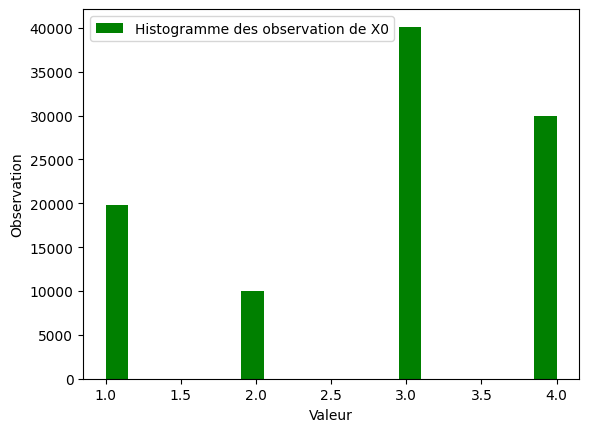

In [89]:
#plot des observation de x0
plt.hist(observation, bins=20, label="Histogramme des observation de X0", color="g")
plt.xlabel("Valeur")
plt.ylabel("Observation")
plt.legend()

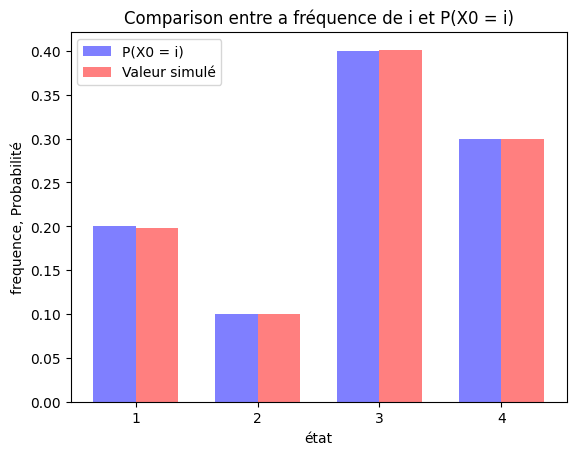

In [90]:
etats = ['1', '2', '3', '4']
# Nous calculons la fréquence des valeurs simulées, puis nous traçons un histogramme proche des valeurs initiales de la distribution S0.
Frequence= [(observation.count(i+1))/100000 for i in range(4)]

# plot
bar_width = 0.35
plt.bar(etats, X0, color='blue', label='P(X0 = i)', alpha=0.5, width=bar_width)
plt.bar(np.arange(len(etats)) + bar_width, Frequence, color='red', label='Valeur simulé', alpha=0.5, width=bar_width)
plt.xlabel('état')
plt.ylabel('frequence, Probabilité')
plt.title('Comparison entre a fréquence de i et P(X0 = i)')
plt.xticks(np.arange(len(etats)) + bar_width / 2, etats)
plt.legend()
plt.show()

3:Création de  la fonction trajectoire qui dans la trajéctoire de la chaine de markov

In [91]:
# defenition de la fonction trajectoire(l)  qui dans la trajéctoire de la chaine de markov
P= np.array([[0, 0, 1, 0],[0.2, 0.3, 0, 0.5],[0.1, 0, 0, 0.9], [0,0.3, 0.7, 0]])
def trajectoire(l):
    Y = np.zeros((l+1, 4))  # Initialisation d'une matrice Y
    traj = []

    Y[0] = [0.2, 0.1, 0.4, 0.3]

    for i in range(1, l+1):
        Y[i] = np.dot(Y[i-1], P)  # Utilisation de np.dot pour la multiplication matricielle

    for i in range(l+1):
        traj.append(simulationX(Y[i]))

    return traj




In [92]:
# test de la fonction trajectoire
trajectoire_resultat = trajectoire(4)
print(f'La trajectoire de la chaine pour l = 4 est [X0,X1,X2,X3,X4]=',trajectoire_resultat)

La trajectoire de la chaine pour l = 4 est [X0,X1,X2,X3,X4]= [3, 3, 3, 3, 3]


4. l’objectif de cette question est de vérifier le théorème Ergodique
Créer une fonction python qui donne une approximation de la mesure invariante
π

In [93]:
#creation de la fonction qui approxime la mesure invariant
def Ergodique(N):
    m = 4
    #defenition de la distribution stationnaire
    pi = np.zeros(m)
    # trajectoire de la chaine de langeur N
    K = trajectoire(N)
    for j in range(4):
        SUM = 0
        for i in range(1, N+1) :
            if K[i] == j+1 :
                SUM = SUM+1
        pi[j] = (1/N)*SUM


    return pi

In [23]:
print (f'la valeur de la mesure invariante pour N = 2000 est', Ergodique(2000))

la valeur de la mesure invariante pour N = 2000 est [0.075  0.162  0.3485 0.4145]


5. Créer une fonction python $T (i)$ qui demande comme argument un état $i$ et qui
caractérise le temps de premier retour à l’état $i$

In [94]:
#fonction premier retour
def premier_retour( i):
    Y = np.zeros((1000, 4))
    Y[0] = [0.2, 0.1, 0.4, 0.3]
    k = simulationX(Y[0])
    while(k!= i):
        k = simulationX(Y[0])
    j = 1
    Y[j] = np.dot(Y[j-1], P)  # Utilisation de np.dot pour la multiplication matricielle
    while simulationX(Y[j])!= i:
        j = j+1
        Y[j] = np.dot(Y[j-1], P)
    return j
#print(f'le premier temps de retoure a etat {i} est :',premier_retour( i))


In [95]:
#test
i = 1
print(f'le premier temps de retoure a l\'etat {i} est :',premier_retour( i))

le premier temps de retoure a l'etat 1 est : 9


6. En utilisant la loi des grandes nombres, donner une approximation de $E (T (i))$

In [96]:
#approximation de l'espirance  de la prmier retour a l'etat i
def pproximationesp(n,i) :

    s = 0
    for j in range(n):
         s = s + premier_retour( i)
    espirance = s/n
    #espirance = 1/result
    return espirance

In [97]:
'''Comparision entre la distribution stationnaire  et l'inverce
de l'espirance de prmier retouentre '''
N =1000
invespe= [1/pproximationesp(N,i) for i in range(1,5)]
pi =  Ergodique(N)
etat = [1, 2, 3, 4]
#for i in range(1,4):

print (f'   Etat : [1, 2, 3, 4]')
print(f'La mesure invariante :', pi)
print(f'L\'inverse de espirance:', invespe)


   Etat : [1, 2, 3, 4]
La mesure invariante : [0.079 0.176 0.357 0.388]
L'inverse de espirance: [0.07103786318107551, 0.16641704110500916, 0.36954915003695493, 0.42643923240938164]


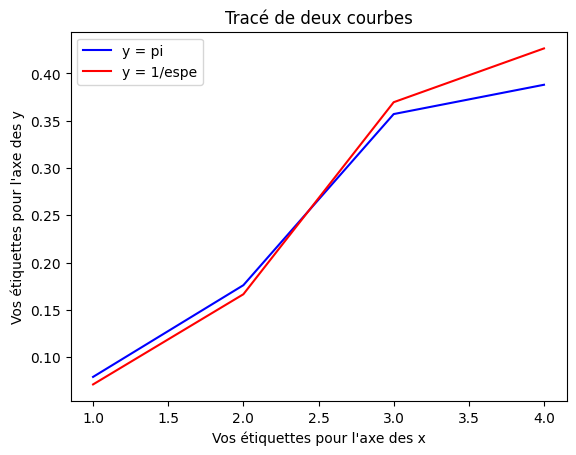

In [98]:
# PLOT De l'inverse de l'esperance et la mesure invariante pour comparer
plt.plot(etat , pi, label='y = pi', color='blue')
plt.plot(etat , invespe, label='y = 1/espe', color='red')

# Ajouter des étiquettes et une légende
plt.xlabel('Vos étiquettes pour l\'axe des x')
plt.ylabel('Vos étiquettes pour l\'axe des y')
plt.title('Tracé de deux courbes')
plt.legend()

# Afficher le graphique
plt.show()

###comparision :
L'inverse de l'espérance est approximativement égal à la mesure invariante

# 2 Simulation des lois continues, application de Monte Carlo

## 2.1 Simulation d’un couple

Soit $(x, y)$ un couple de varialble aléatoire qui suit la loi uniforme sur $B$ avec:
$$
B=\left\{(x, y) \in \mathbb{R}^2 /-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2 \pi}} \leqslant y \leqslant e^{-|x|}\right\} \text {. }
$$

Soit $f_X$ fa fonction de denisté de $X$ :
$$
f_X(t)=\frac{1}{3}\left(\frac{e^{-\frac{t^2}{2}}}{\sqrt{2 \pi}}+e^{-|t|}\right)
$$

En utilisons la méthode de loi inverse réalisons la simulation de $f(t)=\frac{1}{2} e^{-\mid t|}$
<br>
Soit $Z$ une variable aléatoire qui a $\mathcal{f}$ Comme une fonction de dens densité:
déterminons sa fanction de répantition.
- si  $x \leqslant 0$.
$$
F_x(x)=P(X\leq x)=\int_{-\infty}^x \frac{1}{2} e^t d t=\frac{1}{2} e^x .
$$
- $x>0$.
$$
\begin{aligned}
F_X(x)=P(X \leqslant x) & =\int_{-\infty}^0 \frac{1}{2} e^t d t+\int_0^x \frac{1}{2} e^{-t} d t \\
& =1-\frac{1}{2} e^{-x}
\end{aligned}
$$

Alors
$$
F_x(x)= \begin{cases}\frac{1}{2} e^x & \text { si } x \leqslant 0 \\ 1-\frac{1}{2} e^{-x} & \text { sinon }\end{cases}
$$
la fonction $F_x$ est bijective: de $\mathbb{R}$ dans $[0,1]$.
<br>
Calculons  la fonction inverse de $F_X(x)$
<br>
$F_x(x)=y$
\begin{cases}y = \frac{1}{2} e^x & \text { si } x \leqslant 0 \\ y= 1-\frac{1}{2} e^{-x}  & \text { sinon }  .\end{cases}$

alors $$F_x^{-1}(y)= \begin{cases}\ln (2 y) & \text { si } y \leqslant F_x(0) \\ \ln (2(1-y)) & \text { sin } .\end{cases}$$
 Finalement $Z$ suit même loi que $F_x^{-1}(u)$ avec u suit la loi uniforme sur $[0,1]$
 <br>
 (a).2:
 <br>
 - En utilisons fa méthode de Box-muller réalisons la simulation de $X$ puis de $(X, Y)$:
 <br>
  - Simulation de $X$
  on a $$\quad f_x(t)=\frac{1}{3} \frac{e^{-\frac{t^2}{2}}}{\sqrt{2 \pi}}+\frac{1}{3} e^{-|t|}$$
Donc $$f_x(t)=\frac{1}{3} N(0,1)+\frac{2}{3} Z$$
-1: Premier étape simulation de loi normal avec la méthode de Bax-muller
<br>
-2: Deuxene étape simulation de $X$ avec la méthode mixte.
<br>

 - Simulation de $(X, Y )$
- calculons $f_{y / X=x}(y)$
$$
\begin{aligned}
& f_{Y / X=x}(y) =  \quad \frac{f_(X, Y)(x, y)}{f_X(x)}=\frac{1}{\operatorname{surface }(B)*f_X(x)} \cdot 1_B(x, y) . \\
& -\operatorname{surface}(B)=\int_R d x d y=\int_R (\int_{-\frac{e^{-\frac{2}{2}}}{\sqrt{2 \pi}}}^{e^{-x \mid}} dy )d x=3 \\
&
\end{aligned}
$$
Donc la sunface de $B$ ègal: $3 \mathrm{~m}^2$ (unité de surface ).
<br>En trouve alors que  $Y\sim u\left(\left[-\frac{e^{-x^2}}{\sqrt{2 \pi}}, e^{-|x|}\right)\right)$.
- ètape $(1)$ : simulation de X.
- étape(2): simulation de $Y$ sachant $X=x$.
- étape (3): simulation de $(X, Y)$.
<br>


In [99]:
## la fonction de répartition de x
def reparx(x):
    if x<=0:
        return (1/2)*np.exp(x)
    else :
         return 1-(1/2)*np.exp(-x)
 #simulation de x
def SimulatX():
    u = np.random.uniform(0,1)
    if u<=reparx(0):
        return np.log(2*u)
    else:
        return np.log(2*(1-u))






In [100]:
#simulation de loi de binomial avec 1/3= p(x=0)
def B():
    u = np.random.uniform(0,1)
    if u<=1/3:
        return 0
    else :
        return 1



In [101]:
#simualtion de loi normal  avec une methode de Box-muller
def N():
    u = np.random.uniform(0,1)
    v = np.random.uniform(0,1)
    return( np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v))



In [102]:
#simulation de x en utilise la methode mixte et boxe
def generate_x():
    a = B()
    if a == 0:
        return N()
    else:
        return SimulatX()



In [103]:
#simulation de y sachant x
def y(x):
    u = np.random.uniform(0, 1)
    result=(np.exp(-abs(x))+np.exp((-x**2)/2)/(np.sqrt(2*np.pi)))*u -np.exp((-x**2)/2)/(np.sqrt(2*np.pi))
   # if land <= u <= np.exp(-abs(x)):
    return result


In [104]:
#simulation de couple
def xy():
    a_val = generate_x()
    b_val = y(a_val)
    return a_val, b_val

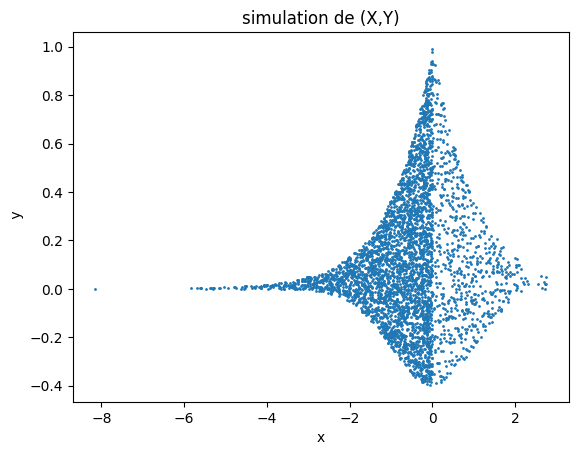

In [105]:
#plot de simulation de couple (x,y)
a_values = []
b_values = []
for i in range(4000):
    x_val, y_val = xy()
    a_values.append(x_val)
    b_values.append(y_val)

plt.scatter(a_values, b_values, s=1)
plt.xlabel('x')
plt.ylabel(' y')
plt.title('simulation de (X,Y)')
plt.show()



b) L'approximation de l'intégrale: $\iint_B e^{-|x*y|} d x d y$ par la méthode de Monte Carlo

$$
\begin{aligned}
\iint_B e^{-|x, y|} d x d y & \simeq \frac{1}{n} \sum_{i=1}^n \frac{e^{-|x, y|}}{f_{X,Y}(x, y)} \cdot 1_B(x, y)  \\
& =\frac{1}{n} \sum_{i=1}^n 3 e^{-|x*y|}
\end{aligned}
$$
Alors,
$$\iint_B e^{-|x \cdot y|} d x d y \simeq \frac{1}{n} \sum_{i=1}^n 3 e^{-|x * y|}.$$

In [106]:
#approximation de l'integral
def app(n):
    s= 0
    for i in range(n):
        a = generate_x()
        b= y(a)
        s = s + 3*np.exp(-abs(a*b))
    return s/n
print('La valeur approcie de integral par la methode de monte carlo est :',app(90))

La valeur approcie de integral par la methode de monte carlo est : 2.727419826517697


## 2.2 La croissance Bactérienne :Escherichia coli (EC)

1. Réaliser la simulation de la loi exponentielle de paramètre 1/20
. (Donner l’instant de
premier division)
<br>
On va utiliser la méthode de la loi inverse.
<br>
Soit $X$ suit une loi $E(\lambda)$, La fonction de répartition $F_X$ de la loi exponentielle est une bijection de l'intervalle $[0, +∞[$ dans $[0,1]$
et $$F_X^{-1}(y) = -\frac{log(1-y)}{\lambda}$$
<br>
Donc X suit même loi que la variable $-\frac{log(1-u)}{\lambda}$
avec $$u \sim U(0,1)$$


In [107]:
#simulation de la loi expo
def expo(l) :
    u = np.random.uniform(0,1)
    return(-np.log(1-u)/l)
t1= expo(1/20)

print(f'l\'instant de a première division, est:',t1)

l'instant de a première division, est: 0.68715009736183


2.Donner l’instant auquel la cellule 1 va se deviser et l’instant correspondante à la
deuxième cellule.

In [108]:
'''2 l’instant auquel la cellule 1 va se deviser et l’instant correspondante à la
deuxième cellule'''

t2 = t1 + expo(1/20)
t3 = t1 + expo(1/20)
print('l\'insant   auquel la cellule 1 va se deviser est', t2 )
print('l\'instant auquel la cellule 2 va se deviser est:',t3)

l'insant   auquel la cellule 1 va se deviser est 1.5777986454490034
l'instant auquel la cellule 2 va se deviser est: 2.1292422554435464


3. Donner tous les instants, entre 0 et 1000, auxquels une division cellulaire aura lieu

In [109]:
# les instants, entre 0 et 1000, auxquels une division cellulaire aura lieu

def div_time(t1, t_max):
  instant_division = [0, t1]
  i = 1

  while(max(instant_division) <= t_max):
    new_div = []
    for j in range(i, len(instant_division)):
      t = instant_division[i]
      new_div += [t+expo(1/20), t+expo(1/20)]
      i += 1
    instant_division += new_div

  return instant_division

instant_division = div_time(t1, 500)
print('Les instants, entre 0 et 1000, auxquels aura une division cellulaire est: ', instant_division)


Les instants, entre 0 et 1000, auxquels aura une division cellulaire est:  [0, 0.68715009736183, 31.533307449612927, 59.88747194167395, 53.556182191235635, 80.67694659113707, 80.35087010850334, 65.14649988402434, 67.50115889766613, 68.17005004694325, 84.3800972547299, 87.96224055946124, 84.3242158453146, 82.62248683205834, 78.75470524249462, 79.8524403738031, 98.58681374372313, 79.61583993325522, 90.29715979046497, 76.77920609475294, 101.8757776538125, 111.44583629001298, 112.08643365410555, 115.11543025159213, 86.5800381996174, 97.93512765514492, 117.34331411396305, 99.18299387261554, 89.12773025955258, 88.7571525559272, 84.59373865413345, 82.96665035139365, 119.2823117273185, 116.26195314873, 163.84832321276087, 95.7653001045042, 110.0304874816932, 93.01338753830863, 83.50902543416963, 89.54829711348947, 110.84406763065881, 138.8455047990215, 126.75411066433068, 133.20067549452673, 119.15162976276892, 128.8412122661265, 117.40884289109019, 126.6957540106087, 97.70526744545323, 168.28

4. Dans chaque division on aura une augmentation de nombre de cellules dans le
milieu par 1. Soit $N (t)$ le nombre de cellules dans le milieu à l’instant t, tracer la
courbe $(t, N (t))$ avec $0 ≤ t ≤ 1000$

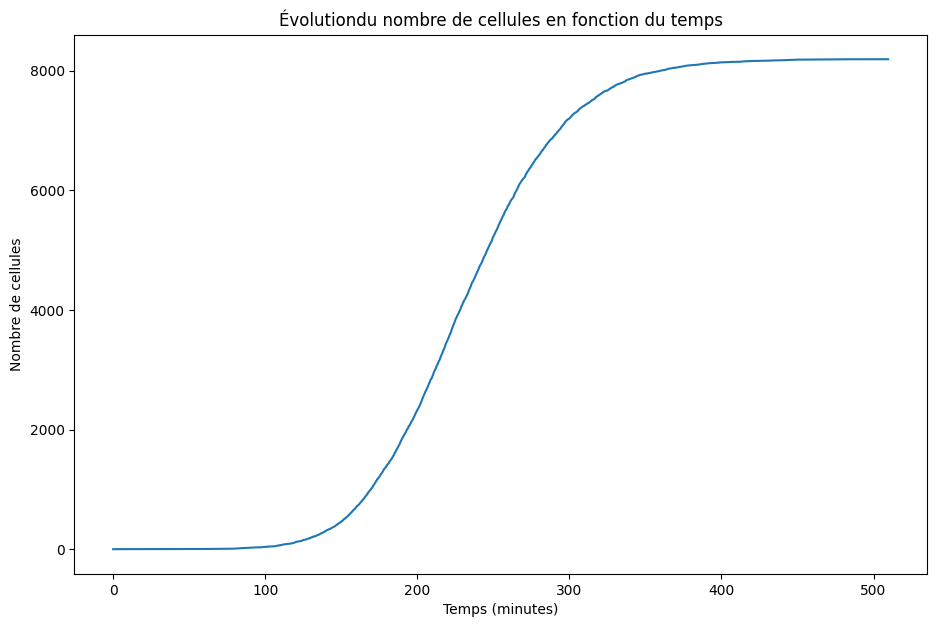

In [110]:
NembreCil = [1]
for i in range(1, len(instant_division)):
  NembreCil.append(NembreCil[-1]+1)

fig = plt.figure(figsize=(11, 7))
plt.plot(sorted(instant_division), NembreCil, '-')
plt.xlabel("Temps (minutes)")
plt.ylabel("Nombre de cellules")
plt.title("Évolutiondu nombre de cellules en fonction du temps")
plt.show()